In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ann_visualizer.visualize import ann_viz
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, AveragePooling2D, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
sns.set(style="whitegrid")

%matplotlib inline

2023-09-25 20:46:18.499394: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
import os
dir = "../../augmented_train"
# dir = "../../separated_bottles"

# dir = r'C:\Users\RETRETA\Documents\Python\AI_ML_Bootcamp\ai_ml\final project\YOLOv8 Object Detection\drinks_dataset\train'
classes = os.listdir(dir)
classes.remove('.DS_Store')
# classes = ['1x2', '1x2x2', '2x2']
classes

['other', 'mountain_dew', 'pocari', 'coke']

In [26]:
image_size = (256, 256)
batch_size = 10  # You can adjust this batch size as needed

# Create the image dataset
image_dataset = image_dataset_from_directory(
    directory=dir,  
    labels="inferred",  
    label_mode="int",  
    image_size=image_size,
    color_mode='grayscale',
    shuffle=True,  
    validation_split=0.5,
    subset='training',
    seed=123,
    # batch_size=batch_size  # Specify the batch size
)

X = []
y = []

for batch, labels in image_dataset:
    X.extend(batch)
    y.extend(labels)

X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)


Found 38217 files belonging to 4 classes.
Using 19109 files for training.


2023-09-25 21:24:13.811950: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19109]
	 [[{{node Placeholder/_4}}]]
2023-09-25 21:24:13.813246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19109]
	 [[{{node Placeholder/_4}}]]


(19109, 256, 256, 1) (19109,)


In [27]:
class_names = image_dataset.class_names
class_names

['coke', 'mountain_dew', 'other', 'pocari']

In [28]:
for image_batch, labels_batch in image_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 1)
[2 1 0 0 1 1 2 3 1 3 1 1 3 3 3 2 1 3 1 1 1 3 0 3 0 2 3 0 1 2 2 0]


2023-09-25 21:26:31.149298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19109]
	 [[{{node Placeholder/_4}}]]
2023-09-25 21:26:31.150062: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [19109]
	 [[{{node Placeholder/_0}}]]


2023-09-25 21:26:37.064029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19109]
	 [[{{node Placeholder/_4}}]]
2023-09-25 21:26:37.064488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [19109]
	 [[{{node Placeholder/_4}}]]


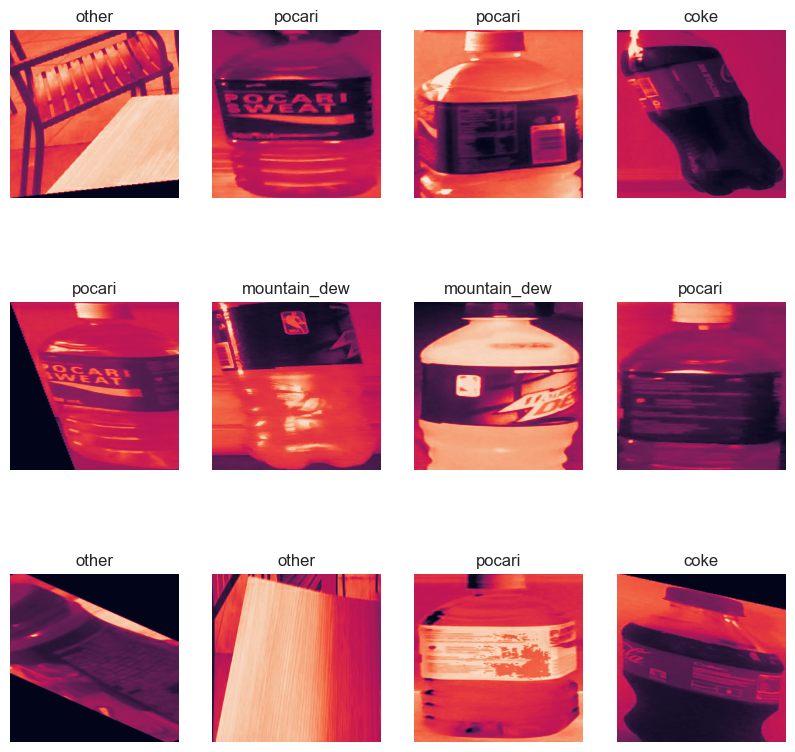

In [29]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in image_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [30]:
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify = y
)

class_counts = Counter(y_train)
print(class_counts)

Counter({0: 2430, 1: 2402, 3: 2372, 2: 2350})


In [8]:
# from keras.callbacks import Callback

# class MaxAccuracyCallback(Callback):
#     def __init__(self):
#         self.max_accuracy = 0.0
    
#     def on_epoch_end(self, epoch, logs=None):
#         current_accuracy = logs.get('val_accuracy')
#         if current_accuracy is not None and current_accuracy > self.max_accuracy:
#             self.max_accuracy = current_accuracy
#             print("New max accuracy:", self.max_accuracy)


### CNN Architecture:

- 

In [31]:
# for filter in range(5,12):
#     for kernel in [5,7,9]:
#         for stride in range(1,6):
#             for pool_size in range (2,5):
#                 for drop_rate in [0.025, 0.05, 0.1, 0.15]:

def create_model():
    model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(256,256,1), padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

    model.compile(
        optimizer='adam', 
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )

    return model

# model = create_model()
# model.summary()

In [10]:
# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

# # Train the model with the new callback
# model.fit(X_train, 
#           y_train,  
#           epochs=15,
#           validation_data=(X_test, y_test),
#           callbacks=[cp_callback])  # Pass callback to training

# # Save the weights
# model.save_weights('./checkpoints/my_checkpoint')


In [11]:
# model_2 = create_model()

# # Evaluate the model
# loss, acc = model_2.evaluate(X_test, y_test, verbose=2)
# print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

In [12]:
# model_2.load_weights(checkpoint_path)

# # Re-evaluate the model
# loss, acc = model_2.evaluate(X_test, y_test, verbose=2)
# print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

In [13]:
# # Save the weights
# model.save_weights('./checkpoints/my_checkpoint')

# # Create a new model instance
# model_3 = create_model()

# # Restore the weights
# model_3.load_weights('./checkpoints/my_checkpoint')

# # Evaluate the model
# loss, acc = model_3.evaluate(X_test, y_test, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [14]:
# import tensorflow as tf
tf.config.list_logical_devices()
# tf.device()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [32]:
# Save the entire model including the architecture

# Create and train a new model instance.
model = create_model()

# Define a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', 
                             monitor='val_accuracy',  # Monitor validation accuracy
                             save_best_only=True,     # Save only the best model
                             mode='max',              # Save when validation accuracy improves
                             verbose=1)               # Display progress

# Train the model with the callback
# with tf.device('/device:GPU:0'):
#     model.fit(X_train, y_train, 
#           epochs=100, 
#         #   batch_size = 1000,
#           validation_data=(X_test, y_test),
#           callbacks=[checkpoint])
model.fit(X_train, y_train, 
          epochs=100, 
          validation_data=(X_test, y_test),
          callbacks=[checkpoint])  # Include the checkpoint callback


# Save the entire model as a `.keras` zip archive.
# model.save('my_model.keras')

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
# model.save('my_model.h5')

Epoch 1/100


2023-09-25 21:31:14.935597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-25 21:31:15.177171: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


299/299 [==============================] - ETA: 0s - loss: 1.1593 - accuracy: 0.5781

2023-09-25 21:32:45.315269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.81381, saving model to best_model.h5
299/299 [==============================] - 114s 363ms/step - loss: 1.1593 - accuracy: 0.5781 - val_loss: 0.5590 - val_accuracy: 0.8138
Epoch 2/100
299/299 [==============================] - ETA: 0s - loss: 0.5124 - accuracy: 0.8416
Epoch 2: val_accuracy improved from 0.81381 to 0.84689, saving model to best_model.h5
299/299 [==============================] - 79s 261ms/step - loss: 0.5124 - accuracy: 0.8416 - val_loss: 0.6630 - val_accuracy: 0.8469
Epoch 3/100
299/299 [==============================] - ETA: 0s - loss: 0.4500 - accuracy: 0.8832
Epoch 3: val_accuracy improved from 0.84689 to 0.87232, saving model to best_model.h5
299/299 [==============================] - 1289s 4s/step - loss: 0.4500 - accuracy: 0.8832 - val_loss: 0.4689 - val_accuracy: 0.8723
Epoch 4/100
299/299 [==============================] - ETA: 0s - loss: 0.3717 - accuracy: 0.9085
Epoch 4: val_accuracy improved from 0.87232 to 0.92

In [ ]:
# model_4 = tf.keras.models.load_model('my_model.keras')

# # Show the model architecture
# model_4.summary()

# # Evaluate the restored model
# loss, acc = model_4.evaluate(X_test, y_test, verbose=2)
# print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

# print(model_4.predict(X_test).shape)

In [33]:
import numpy as np

def predict_lego(X, y, model):
    X = np.array(X)
    y = np.array(y)

    # if len(X.shape) == 3:  
    #     X = np.expand_dims(X, axis=0)
    #     print(X.shape)
    # elif len(X.shape) != 4:
    #     raise ValueError("Input array X must be a 3D or 4D array")

    # X = np.array([cv2.resize(image, (200, 200)) for image in X])
    # X = np.expand_dims(X, axis=0)

    print(X.shape, y.shape)
    y_predicted = model.predict(X)
    y_predicted_labels = [np.argmax(i) for i in y_predicted]

    accuracy = accuracy_score(y, y_predicted_labels)

    print("Accuracy:", accuracy)

    # cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

    # plt.figure(figsize=(10, 7))
    # sns.heatmap(cm, annot=True, fmt='d')
    # plt.xlabel('Predicted')
    # plt.ylabel('Truth')
    # plt.show()
    

# y_loaded = np.load("lego_y_test.npy")
# y_exer = y_loaded - 1
# X_exer = np.load("lego_x_gray_test.npy")
# index_to_predict = 0

predict_lego(X_test, y_test, model)



(9555, 256, 256, 1) (9555,)


2023-09-26 09:40:09.681983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


299/299 [==============================] - 26s 60ms/step
Accuracy: 0.7513343799058084
